In [1]:
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\yitin\Desktop\attention\market_svi_edgar.csv")
df_com =  pd.read_csv(r"C:\Users\yitin\Desktop\attention\investor-attention-returns-patern\data\companies_after_2005.csv")
df.head()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume
0,0,MSFT,2005-01-02,18,31338,145,26.67,398924026.0
1,1,MSFT,2005-01-09,19,33079,3220,26.12,379712121.0
2,2,MSFT,2005-01-16,12,20892,3030,25.65,266617523.0
3,3,MSFT,2005-01-23,20,34820,3539,26.18,409844550.0
4,4,MSFT,2005-01-30,15,26115,4112,26.32,347830186.0


In [7]:
df_com.head()

,Unnamed: 0,Rank,Name,Symbol,marketcap,price (USD),country,IPO_year,capitalization
0,0,1,Microsoft,MSFT,3002343620608,404.06,United States,1986,high
1,1,2,Apple,AAPL,2815212650496,182.31,United States,1980,high
2,2,4,NVIDIA,NVDA,1793541144576,726.13,United States,1999,high
3,3,5,Amazon,AMZN,1760768032768,169.51,United States,1997,high
4,4,6,Alphabet (Google),GOOG,1753911394304,141.76,United States,2004,high


In [30]:
merged_df = pd.merge(df, df_com[['Symbol', 'capitalization']], left_on='symbol', right_on='Symbol', how='left')

merged_df.drop(columns=['Symbol'], inplace=True)

merged_df['weekly_return'] = (merged_df['price'] - merged_df.groupby('symbol')['price'].shift(1)) / merged_df.groupby('symbol')['price'].shift(1)
merged_df.head()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume,capitalization,weekly_return
0,0,MSFT,2005-01-02,18,31338,145,26.67,398924026.0,high,NaN
1,1,MSFT,2005-01-09,19,33079,3220,26.12,379712121.0,high,-0.020622
2,2,MSFT,2005-01-16,12,20892,3030,25.65,266617523.0,high,-0.017994
3,3,MSFT,2005-01-23,20,34820,3539,26.18,409844550.0,high,0.020663
4,4,MSFT,2005-01-30,15,26115,4112,26.32,347830186.0,high,0.005348


In [9]:
low = merged_df['capitalization'] == 'low'
low_cap = merged_df[low]['symbol'].unique()
low_cap

array(['DNN', 'VEON', 'VRTS', 'LKFN', 'CPRX', 'TRMK', 'NBTB', 'CXW',
       'POM.PA', 'BB', 'THRM', 'LZB', 'NSSC', 'SPNS', 'DVAX', 'EIF.TO',
       'TTMI', 'TDS', 'CBRL', 'TARO', 'NTCT', 'CSGS', 'EXTR', 'MRTN',
       'OXM', 'FRU.TO', 'BANR', 'HLX', 'JACK', 'AMWD', 'GPRE', 'UFPT',
       'LIF.TO', 'FBNC', 'FNLC', 'GTY', 'FWRG', 'HWKN', 'HTLF', 'IMKTA',
       'CFP.TO', 'ENGH.TO', 'CTS', 'SYBT', 'FCF', 'LNN', 'LTC', 'CAL',
       'KFRC', 'GES', 'NWN', 'PDFS', 'WG.L', 'ANZFF', 'AG', 'OMCL',
       'LGND', 'BUSE', 'SMTC', 'DBD', 'SPH', 'CMCO', 'WABC', 'MDA.TO',
       'RPT', 'TGI', 'AIV', 'INE.TO', 'MFA', 'NX', 'CGAU', 'PRAA', 'GERN',
       'PERI', 'BHE', 'MGNX', 'GIII'], dtype=object)

In [31]:
# IT low cap
veon = merged_df[(merged_df['symbol'] == 'VEON') & ( merged_df['date'].str.contains('2011') )]
veon.head()


,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume,capitalization,weekly_return
293022,293022,VEON,2011-01-02,36,7632,128,15.37,12817000.0,low,0.021941
293023,293023,VEON,2011-01-09,40,8480,314,15.34,10305300.0,low,-0.001952
293024,293024,VEON,2011-01-16,22,4664,200,13.76,32553700.0,low,-0.102999
293025,293025,VEON,2011-01-23,23,4876,938,13.96,17667500.0,low,0.014535
293026,293026,VEON,2011-01-30,28,5936,712,14.25,14058500.0,low,0.020774


In [36]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 5.5 MB/s eta 0:00:02
    --------------------------------------- 0.2/10.6 MB 3.1 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 2.9 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.6 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.6 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/10.6 MB 2.4 MB/s eta 0:00:04
   ---

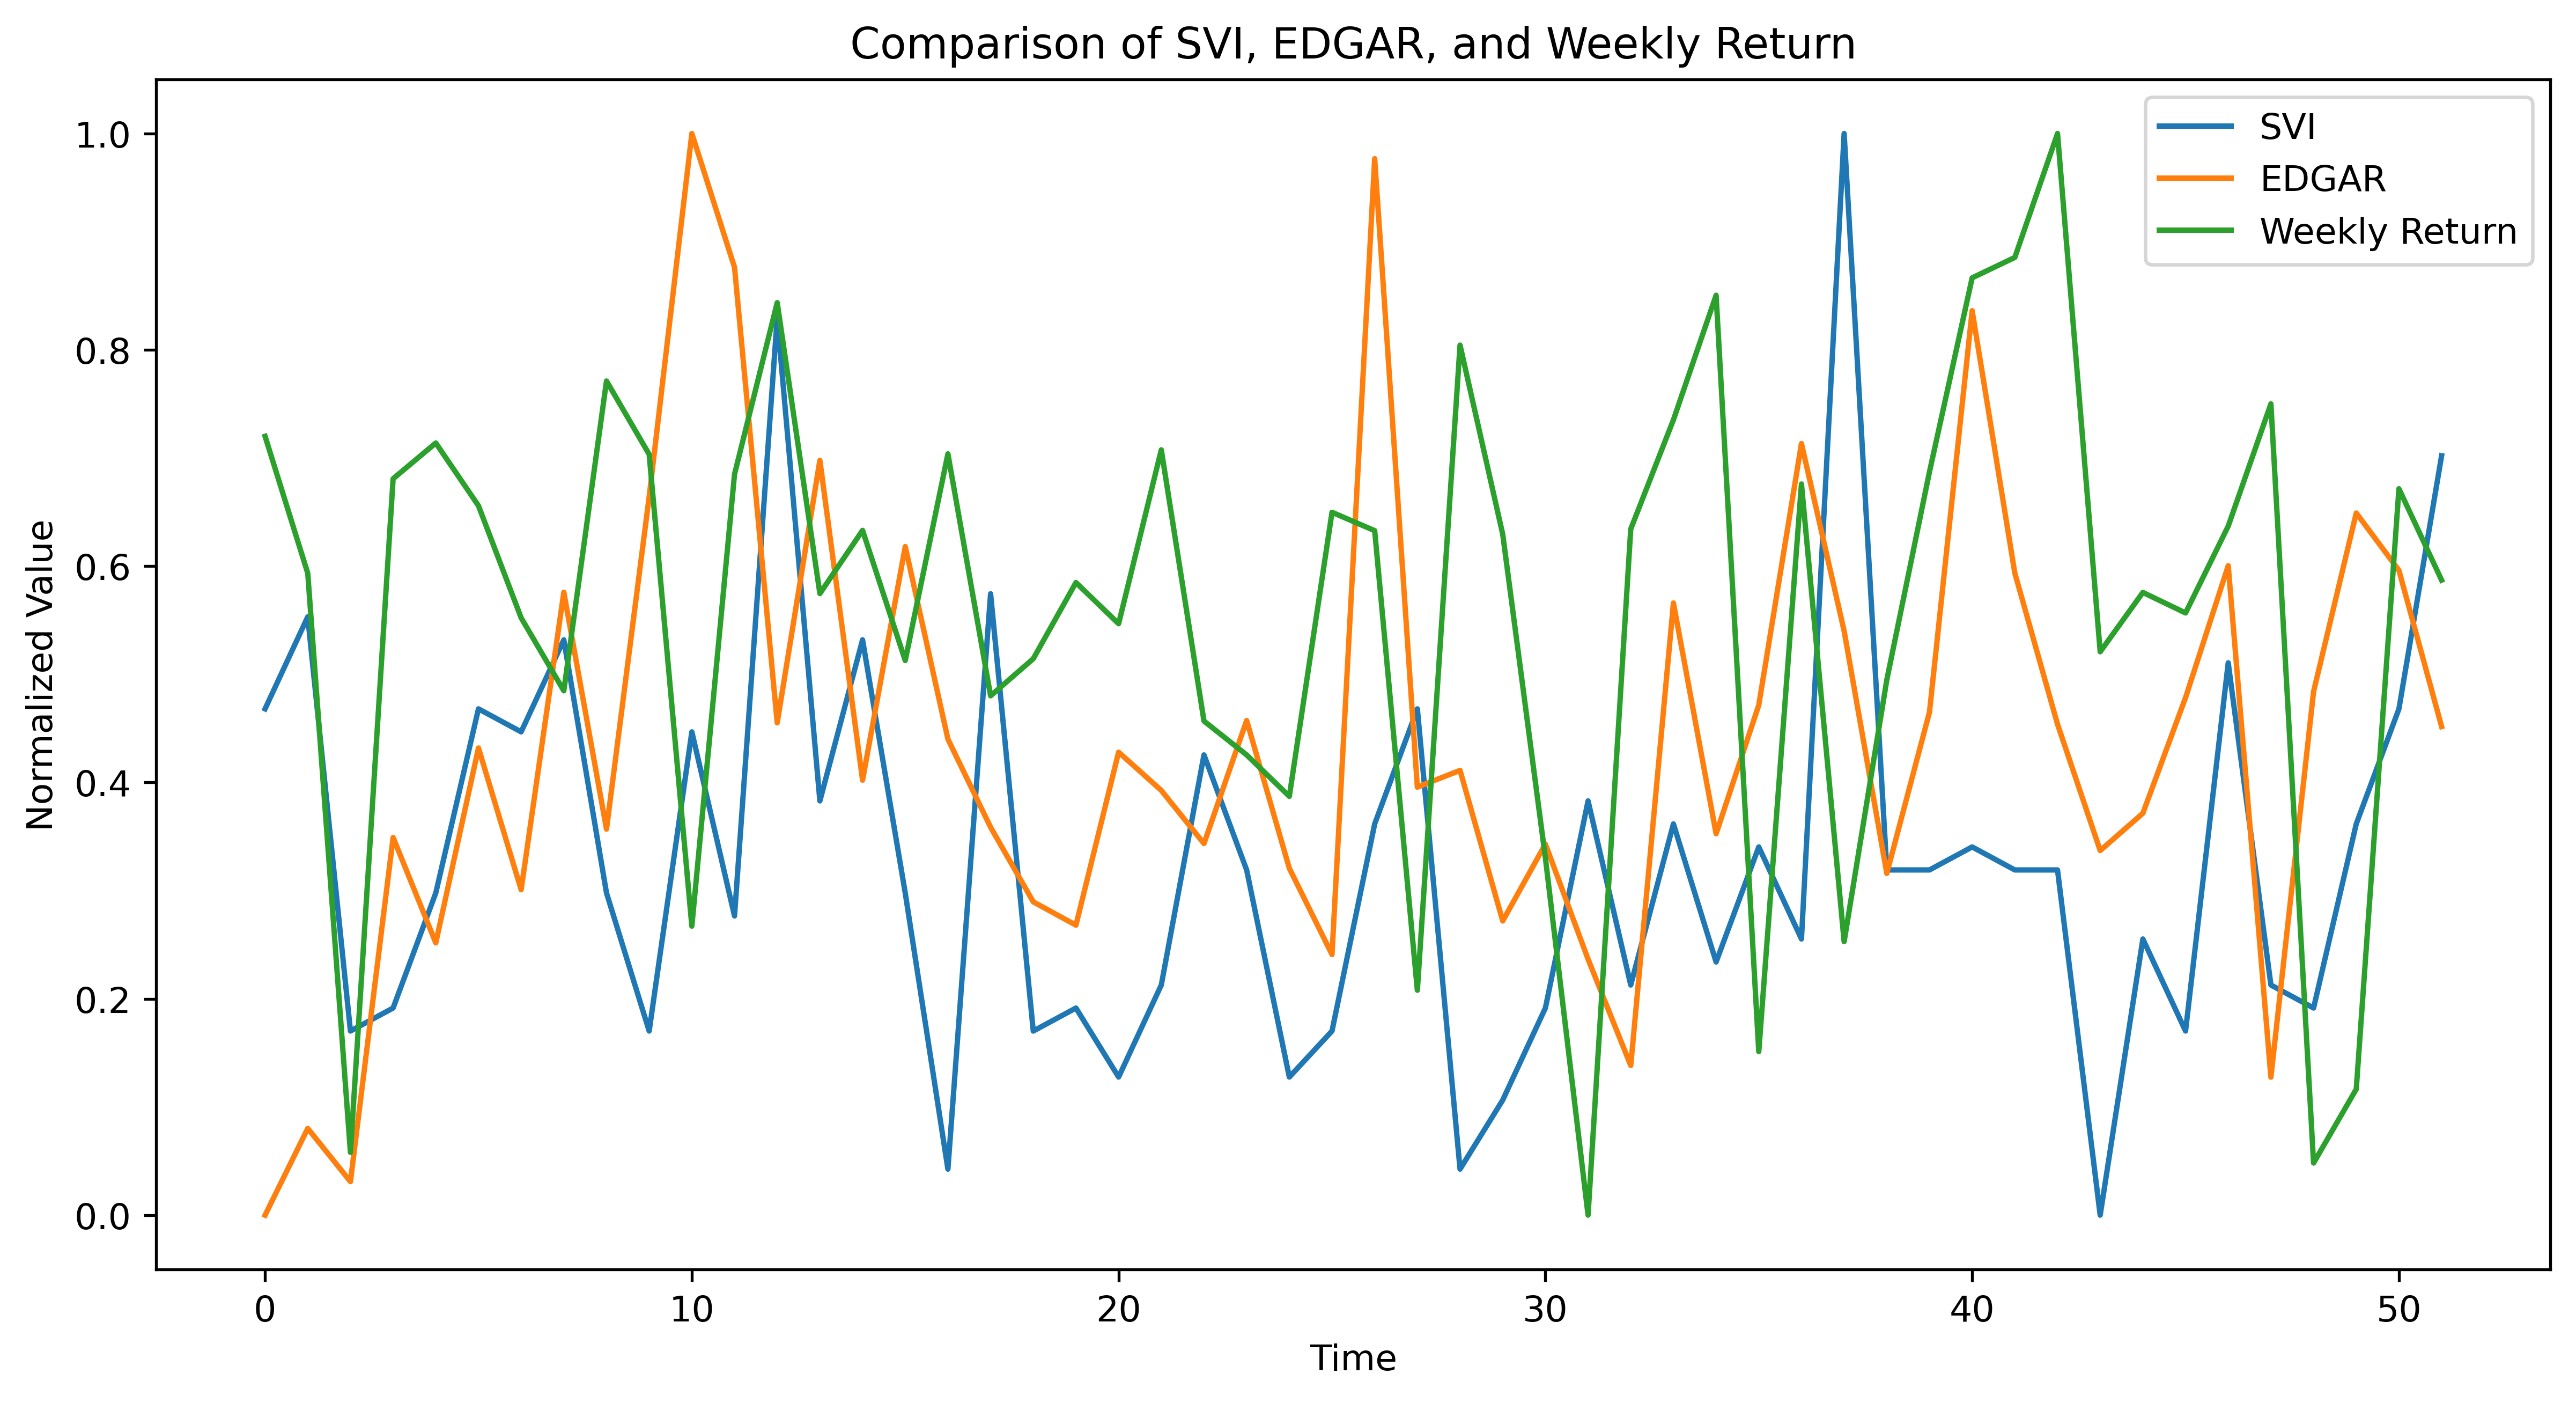

In [39]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data_to_plot = veon[['svi', 'edgar', 'weekly_return']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_plot)

# Create a new DataFrame containing the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=data_to_plot.columns)

# Plot the lines
plt.figure(figsize=(12, 6), dpi = 480)
plt.plot(normalized_df.index, normalized_df['svi'], label='SVI')
plt.plot(normalized_df.index, normalized_df['edgar'], label='EDGAR')
plt.plot(normalized_df.index, normalized_df['weekly_return'], label='Weekly Return')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Comparison of SVI, EDGAR, and Weekly Return')
plt.legend()
plt.show()

In [40]:
veon_halfyear = merged_df[(merged_df['symbol'] == 'VEON') & (merged_df['date'].str.contains('2011')) & (merged_df['date'] >= '2011-01-01') & (merged_df['date'] <= '2011-06-30')]
veon_halfyear.tail()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume,capitalization,weekly_return
293043,293043,VEON,2011-05-29,24,5088,1039,14.06,9278600.0,low,0.019579
293044,293044,VEON,2011-06-05,34,7208,925,13.67,8032400.0,low,-0.027738
293045,293045,VEON,2011-06-12,29,6148,1189,13.21,15605300.0,low,-0.033650
293046,293046,VEON,2011-06-19,20,4240,872,12.67,12567100.0,low,-0.040878
293047,293047,VEON,2011-06-26,22,4664,687,12.78,28711800.0,low,0.008682


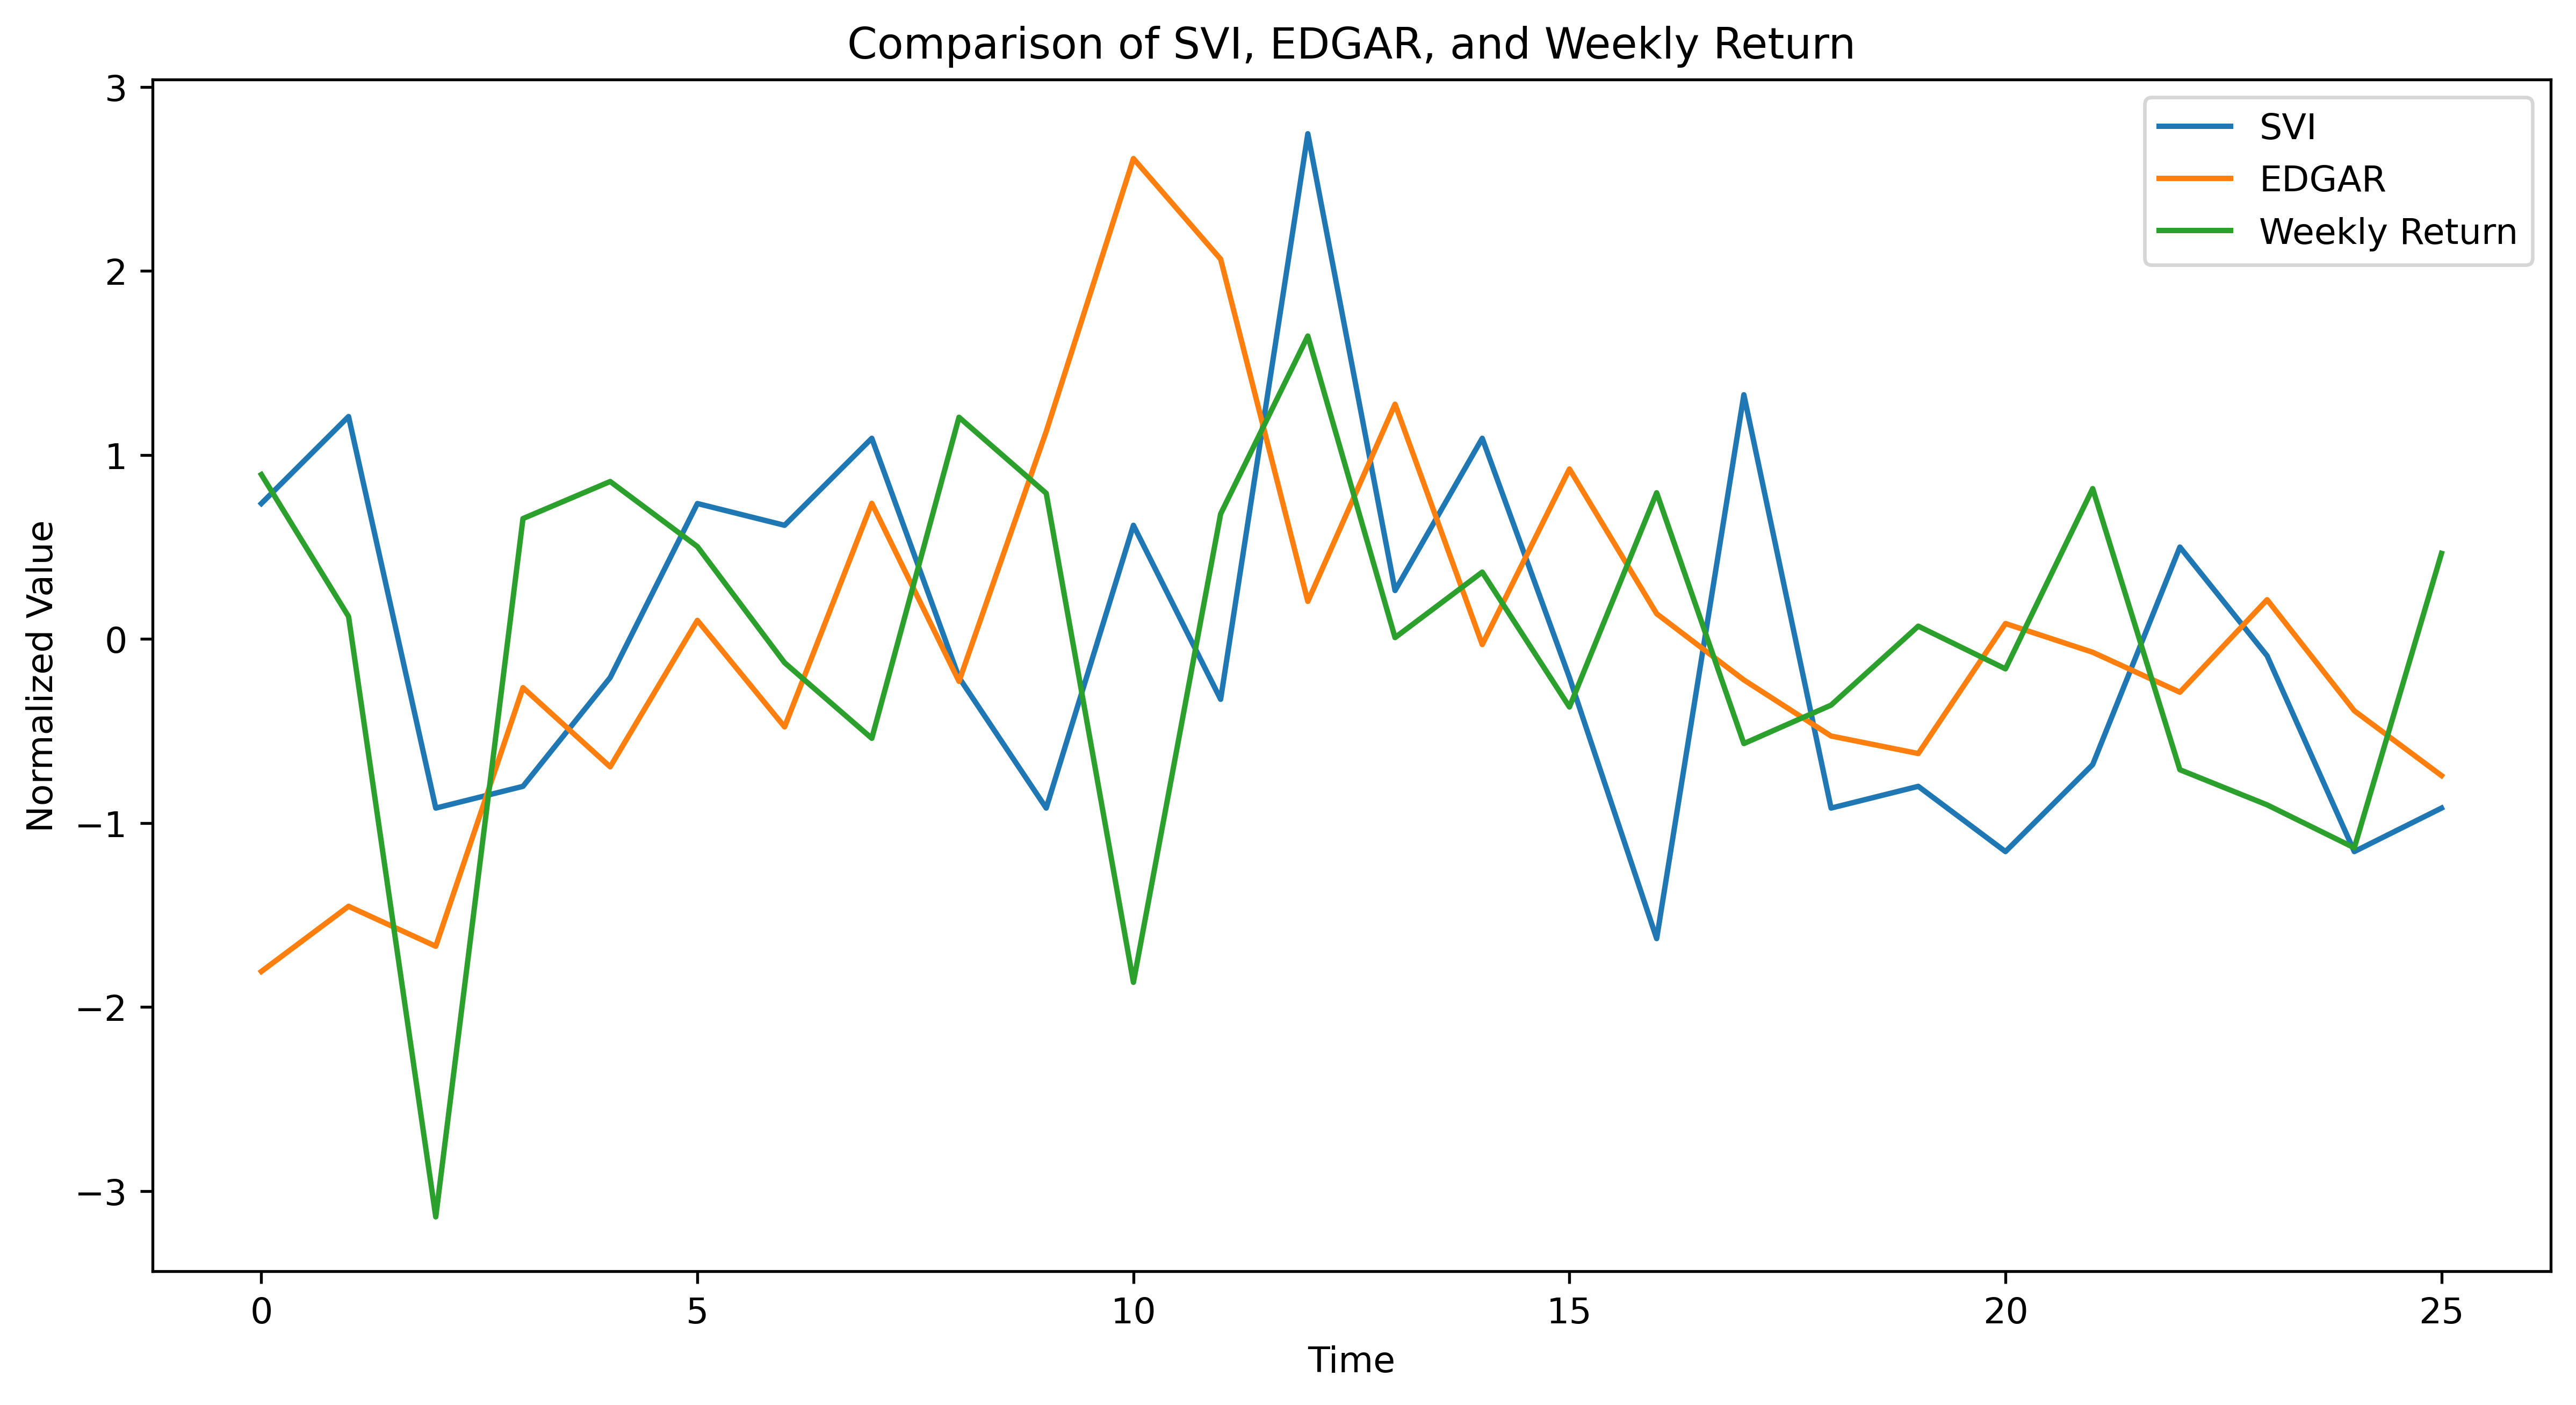

In [44]:
data_to_plot = veon_halfyear[['svi', 'edgar', 'weekly_return']]

# Normalize the data using Z score
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_plot)

# Create a new DataFrame containing the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=data_to_plot.columns)

# Plot the lines
plt.figure(figsize=(12, 6), dpi = 480)
plt.plot(normalized_df.index, normalized_df['svi'], label='SVI')
plt.plot(normalized_df.index, normalized_df['edgar'], label='EDGAR')
plt.plot(normalized_df.index, normalized_df['weekly_return'], label='Weekly Return')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Comparison of SVI, EDGAR, and Weekly Return')
plt.legend()
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler